the perpoes 

In [21]:

#importing the libraries

from pandas.core.dtypes.cast import NumpyArrayT

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import csv
import pandas as pd

from sklearn import preprocessing
# make a prediction with a perceptron model on the dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets

# functions 

In [65]:
def cleaning_text(datas):
    reviews=[]
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    for data in datas:
        review = re.sub('[^a-zA-Z0-9]', ' ', str(data))
        review=re.sub('<[^<]+?>', '', str(review))
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review=" ".join(review)
        review=review.split()
        reviews.append(review)
    return reviews

In [79]:
def wrongdata(map):
  newmap=map[map['newy']!=map['yhat']]
  return newmap

In [69]:
def wordCloudPlot(data,name):
  wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
  wc = wc.generate(str(data.loc[data['title'] == name, 'context']))
  fig = plt.figure(num=1)
  plt.axis('off')
  plt.title('Top words for '+name, 
            fontdict={'size': 22,  'verticalalignment': 'bottom'})
  plt.imshow(wc, cmap=None)
  plt.show()

# geting the data 

In [ ]:
! pip install transformers datasets 

In [23]:
from datasets import load_dataset, load_metric
dataset = load_dataset("squad_v2")
df_train = pd.DataFrame(dataset['train'])


  0%|          | 0/2 [00:00<?, ?it/s]

In [24]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 130319
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 11873
    })
})

In [25]:
df_train = pd.DataFrame(dataset['train'])


# EDA

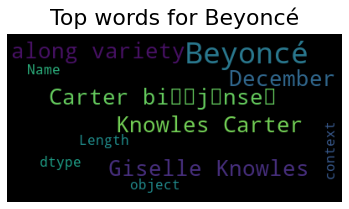

In [73]:
wordCloudPlot(df_train,'Beyoncé')

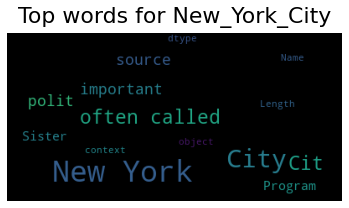

In [74]:
wordCloudPlot(df_train,'New_York_City')

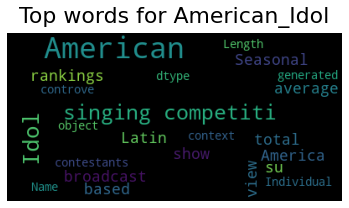

In [75]:
wordCloudPlot(df_train,'American_Idol')

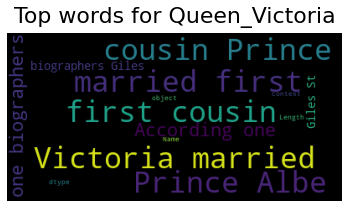

In [76]:
wordCloudPlot(df_train,'Queen_Victoria')

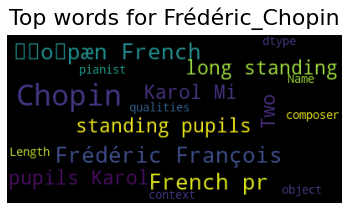

In [77]:
wordCloudPlot(df_train,'Frédéric_Chopin')

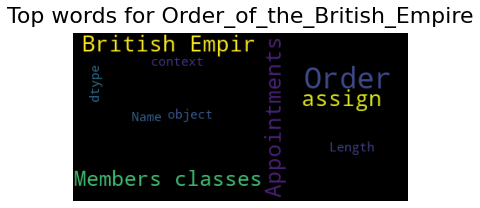

In [78]:
wordCloudPlot(df_train,'Order_of_the_British_Empire')

seeing the size of the data before removing the reduant

In [27]:
df_train[df_train['title']=='Beyoncé']

,id,title,context,question,answers
0,56be85543aeaaa14008c9063,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,"{'text': ['in the late 1990s'], 'answer_start'..."
1,56be85543aeaaa14008c9065,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,"{'text': ['singing and dancing'], 'answer_star..."
2,56be85543aeaaa14008c9066,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,"{'text': ['2003'], 'answer_start': [526]}"
3,56bf6b0f3aeaaa14008c9601,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,"{'text': ['Houston, Texas'], 'answer_start': [..."
4,56bf6b0f3aeaaa14008c9602,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?,"{'text': ['late 1990s'], 'answer_start': [276]}"
...,...,...,...,...,...
748,56bfed855a85de14001c7868,Beyoncé,"In December, Beyoncé along with a variety of o...",What crowdfunding platform was used in the con...,"{'text': ['Catapult'], 'answer_start': [1409]}"
749,56d4fa2e2ccc5a1400d833ca,Beyoncé,"In December, Beyoncé along with a variety of o...",What is the name of the campaign that Beyoncé ...,"{'text': ['Demand A Plan'], 'answer_start': [1..."
750,56d4fa2e2ccc5a1400d833cb,Beyoncé,"In December, Beyoncé along with a variety of o...",What school shooting prompted the creation of ...,"{'text': ['Sandy Hook Elementary School'], 'an..."
751,56d4fa2e2ccc5a1400d833cc,Beyoncé,"In December, Beyoncé along with a variety of o...",What song did Beyoncé donate to the 2012 World...,"{'text': ['I Was Here'], 'answer_start': [412]}"


In [28]:
df_train=df_train.drop(['id'], axis=1)
df_train=df_train.drop(['question'], axis=1)
df_train=df_train.drop(['answers'], axis=1)

In [29]:
df_train1=df_train.drop_duplicates(subset='context', keep="last")

In [30]:
df_train[df_train['title']=='Beyoncé']

,title,context
0,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
1,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
2,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
3,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
4,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
...,...,...
748,Beyoncé,"In December, Beyoncé along with a variety of o..."
749,Beyoncé,"In December, Beyoncé along with a variety of o..."
750,Beyoncé,"In December, Beyoncé along with a variety of o..."
751,Beyoncé,"In December, Beyoncé along with a variety of o..."


In [31]:
df_train2=df_train1.iloc[:1000]

In [32]:
data=df_train2['context']
target=df_train2['title']

# `Classifcation`

In [33]:
## for scraping

import requests
import numpy as np
import pandas as pd
import re
from sklearn.svm import SVC
from bs4 import BeautifulSoup
from sklearn.neighbors import KNeighborsClassifier 
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
##skill learn 
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score


In [34]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
target = LE.fit_transform(target)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.20, random_state = 0,stratify=df_train2['title'])

In [37]:
X_train

4842    West's life took a different direction when hi...
4488    Solar radiation is absorbed by the Earth's lan...
4927    West's fourth studio album, 808s & Heartbreak ...
3509    On August 24, 1673, Dutch captain Anthonio Col...
4266    To Kill a Mockingbird was Lee's only published...
                              ...                        
1669    P. Christiaan Klieger, an anthropologist and s...
4446    The strongest element of style noted by critic...
4874    Following a headlining set at Coachella 2011 t...
1625    Despite this glowing message by the Emperor, C...
4774    West spent much of the late-1990s producing re...
Name: context, Length: 800, dtype: object

In [38]:
y_train

array([ 6,  9,  6,  7, 12,  6,  6,  4,  0,  9,  2,  3,  5,  2,  3,  6,  7,
        7,  2,  2,  6,  9,  0,  3,  9,  3,  3,  3,  4,  1,  0,  3, 11,  8,
        7,  7,  7,  9,  7, 12,  7, 10, 11,  2, 11,  1,  3,  1,  1,  3,  7,
        3,  1, 12,  5,  2,  3,  9,  7,  8, 10,  7,  7,  0,  6,  4,  6,  7,
        5,  3, 12,  0,  9,  7,  8,  0,  4,  3, 12,  6,  1,  4,  3,  4,  3,
        4,  7, 12,  0,  7,  2,  1,  0,  3, 12,  6,  5,  0,  1, 12,  0, 12,
        9,  1, 10, 12,  3,  1,  0,  7,  5, 12,  8,  2,  4,  8,  3,  1,  3,
       12,  7,  0,  2,  3,  4,  7,  2,  6, 11,  7, 10,  8,  7,  7,  8,  2,
        8,  6,  7,  7,  2,  4,  8, 11,  9,  7,  3,  0,  4, 10,  4,  2,  3,
        4,  4, 11,  3,  6,  7,  4,  0,  0,  7,  7,  6,  9,  9,  9, 10,  5,
        3,  2,  7,  9,  5,  3,  4,  2,  7, 11, 10,  4,  2,  2,  7,  0,  2,
        8,  0,  3,  1,  6,  2,  7,  1,  0,  6,  8,  7,  1,  9,  5,  3,  1,
        3,  2,  2,  5, 10,  4,  8,  1,  1,  6,  1, 12,  5,  1,  7, 10,  6,
        3,  7,  2,  3,  0

In [39]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

800
800
200
200


In [40]:
# Fit the pipeline with the data
def calc_accuracy_and_confusion_matrix(pipe,X_train, X_test, y_train, y_test):


  pipe.fit(X_train, y_train)
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score 
  y_pred_class = pipe.predict(X_test)

  print(accuracy_score(y_test, y_pred_class))

  cm = confusion_matrix(y_test, y_pred_class)
  import seaborn as sns
  sns.heatmap(cm, annot = True)
  return y_pred_class

In [41]:
def calc_classification_report(y_pred_class):
  
  from sklearn.metrics import classification_report
  mat=classification_report(y_test, y_pred_class)
  print(mat)

MNB with BOW & TD-IDF

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
pipe_NB = Pipeline([('bow', CountVectorizer(ngram_range=(1,2))), 

                ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

0.61


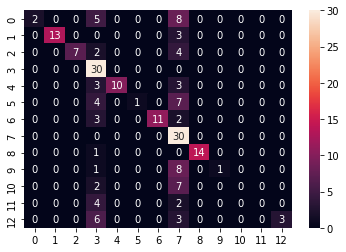

In [43]:
y_pred_class=calc_accuracy_and_confusion_matrix(pipe_NB,X_train, X_test, y_train, y_test)

In [44]:
calc_classification_report(y_pred_class)

              precision    recall  f1-score   support

           0       1.00      0.13      0.24        15
           1       1.00      0.81      0.90        16
           2       1.00      0.54      0.70        13
           3       0.49      1.00      0.66        30
           4       1.00      0.62      0.77        16
           5       1.00      0.08      0.15        12
           6       1.00      0.69      0.81        16
           7       0.39      1.00      0.56        30
           8       1.00      0.93      0.97        15
           9       1.00      0.10      0.18        10
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00         6
          12       1.00      0.25      0.40        12

    accuracy                           0.61       200
   macro avg       0.76      0.47      0.49       200
weighted avg       0.76      0.61      0.56       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
pipe_DT = Pipeline([('bow', CountVectorizer()), 
                 ('model', tree.DecisionTreeClassifier())])

DT with BOW 

0.875


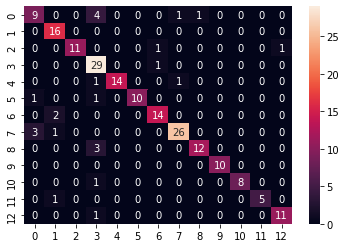

In [46]:
y_pred_class=calc_accuracy_and_confusion_matrix(pipe_DT,X_train, X_test, y_train, y_test)

In [47]:
calc_classification_report(y_pred_class)

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.80      1.00      0.89        16
           2       1.00      0.85      0.92        13
           3       0.72      0.97      0.83        30
           4       1.00      0.88      0.93        16
           5       1.00      0.83      0.91        12
           6       0.88      0.88      0.88        16
           7       0.93      0.87      0.90        30
           8       0.92      0.80      0.86        15
           9       1.00      1.00      1.00        10
          10       1.00      0.89      0.94         9
          11       1.00      0.83      0.91         6
          12       0.92      0.92      0.92        12

    accuracy                           0.88       200
   macro avg       0.91      0.87      0.89       200
weighted avg       0.89      0.88      0.88       200



KNN with BOW

In [48]:
pipe_KNN = Pipeline([('bow', CountVectorizer()), 
                 ('model', KNeighborsClassifier())])

0.53


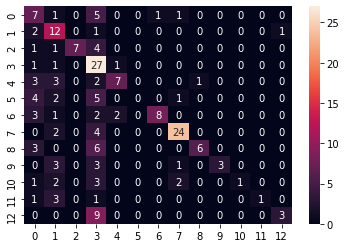

In [49]:
y_pred_class=calc_accuracy_and_confusion_matrix(pipe_KNN,X_train, X_test, y_train, y_test)

In [50]:
calc_classification_report(y_pred_class)

              precision    recall  f1-score   support

           0       0.27      0.47      0.34        15
           1       0.39      0.75      0.51        16
           2       1.00      0.54      0.70        13
           3       0.38      0.90      0.53        30
           4       0.70      0.44      0.54        16
           5       0.00      0.00      0.00        12
           6       0.89      0.50      0.64        16
           7       0.83      0.80      0.81        30
           8       0.86      0.40      0.55        15
           9       1.00      0.30      0.46        10
          10       1.00      0.11      0.20         9
          11       1.00      0.17      0.29         6
          12       0.75      0.25      0.38        12

    accuracy                           0.53       200
   macro avg       0.70      0.43      0.46       200
weighted avg       0.66      0.53      0.51       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CLustering

In [51]:
## for scraping

import requests
import numpy as np
import pandas as pd
import re
from sklearn.svm import SVC
from bs4 import BeautifulSoup
from sklearn.neighbors import KNeighborsClassifier 
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
##skill learn 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import scipy 
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.base import TransformerMixin
from sklearn.metrics import cohen_kappa_score
from sklearn.decomposition import PCA
import nltk
from nltk.collocations import *
nltk.download('genesis')


[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.


True

In [52]:
def plot_elbow(pipe):
  wcss = []
  pipe.fit(data)
  NEWX=pipe["preprocessor"].transform(data)
  for i in range(1, 20):
      pipe["clusterer"]["kmeans"].n_clusters= i
      pipe.fit(data)

      wcss.append(pipe["clusterer"]["kmeans"].inertia_)
  pipe["clusterer"]["kmeans"].n_clusters=13
  pipe.fit(data)
  plt.plot(range(1, 20), wcss)
  plt.title('Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()
  

In [53]:
def eva(pipe1,X,y,name):
  if name== 'kmeans':
    preprocessed_data = pipe1["preprocessor"].transform(X)
    
    predicted_labels = pipe1["clusterer"][name].labels_
   
  else:
    predicted_labels=pipe1.fit_predict(X)
    preprocessed_data = pipe1["preprocessor"].transform(X)
  print(len(X.unique()))

  Finall= newY(predicted_labels,X,y)


  print('the silhouette score is : {:.2f}'.format(silhouette_score(preprocessed_data, predicted_labels)))
  print('the v_measure score is : {:.2f}'.format(v_measure_score(predicted_labels,y)))
  print('the cohen kappa score is : {:.2f}'.format(cohen_kappa_score( Finall['yhat'],Finall['newy'])))
  return Finall,predicted_labels

In [54]:
def newY(yhat,X,y):
  data = pd.DataFrame()
  newdata = pd.DataFrame()
  data['yhat']=yhat
  data['X']=X
  data['y']=y
  for i in range(len(data["y"].unique())):
    c1=data[data['y']==i]
    c1['newy']=int(c1['yhat'].mode())
    
    newdata=newdata.append(c1)
 
 
  return newdata

In [55]:
def tnesplot(pip,data,target,lable):
  tsne = TSNE(n_components=2, verbose=1, random_state=123)
  NEWX=pip["preprocessor"].transform(data)
  z = tsne.fit_transform(NEWX)
  df = pd.DataFrame()
  df["y"] = target
  df["comp-1"] = z[:,0]
  df["comp-2"] = z[:,1]
  Title=" T-SNE projection "+lable

  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                  palette=sns.color_palette("hls", len(df["y"].unique())),
                  data=df).set(title=Title)

In [56]:
data=df_train2['context']


In [57]:
preprocessor = Pipeline(
    [('bow', CountVectorizer()),
     ('tfid', TfidfTransformer()),
     
     ]
)


In [58]:
from sklearn.cluster import KMeans
Kmeanclusterer = Pipeline(
   [
       ("kmeans",
           KMeans(
               n_clusters=13,
               init="k-means++",
               random_state=42,
           ),
       ),
   ]
)

In [59]:
KMpipline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", Kmeanclusterer)
    ]
)

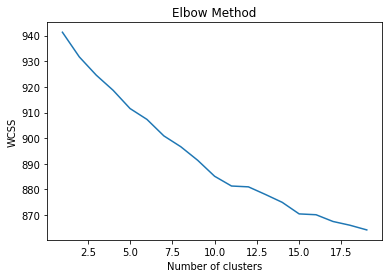

In [60]:
plot_elbow(KMpipline)

In [61]:
data

14      Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
26      Following the disbandment of Destiny's Child i...
38      A self-described "modern-day feminist", Beyonc...
51      Beyoncé Giselle Knowles was born in Houston, T...
62      Beyoncé attended St. Mary's Elementary School ...
                              ...                        
6245    Phillips became the winner, beating Sanchez. P...
6250    Phillips released "Home" as his coronation son...
6255    Season 12 premiered on January 16, 2013. Judge...
6261    The top 10 contestants started with five males...
6269    23-year-old Candice Glover won the season with...
Name: context, Length: 1000, dtype: object

In [62]:
print(len(data.unique()))

map,yhat=eva(KMpipline,data,target,'kmeans')


1000
1000
the silhouette score is : 0.02
the v_measure score is : 0.83
the cohen kappa score is : 0.82


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 1000 samples in 0.082s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.266883
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.697937
[t-SNE] KL divergence after 1000 iterations: 1.012137


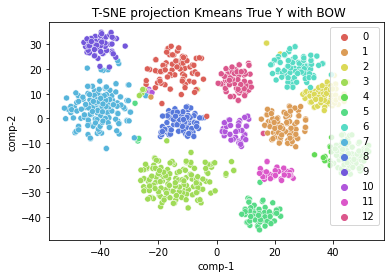

In [63]:
tnesplot(KMpipline,data,target,"Kmeans True Y with BOW")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.085s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.266883
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.697937
[t-SNE] KL divergence after 1000 iterations: 1.012137


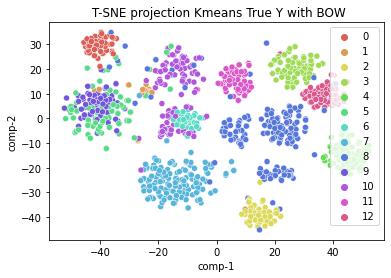

In [64]:
tnesplot(KMpipline,data,yhat,"Kmeans True Y with BOW")